## sales analysis

### import Libs (toolkit)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### load dataset

In [2]:
df=pd.read_csv("50000 Sales Records.csv")

In [3]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Namibia,Household,Offline,M,8/31/2015,897751939,10/12/2015,3604,668.27,502.54,2408445.08,1811154.16,597290.92
1,Europe,Iceland,Baby Food,Online,H,11/20/2010,599480426,1/9/2011,8435,255.28,159.42,2153286.80,1344707.70,808579.10
2,Europe,Russia,Meat,Online,L,6/22/2017,538911855,6/25/2017,4848,421.89,364.69,2045322.72,1768017.12,277305.60
3,Europe,Moldova,Meat,Online,L,2/28/2012,459845054,3/20/2012,7225,421.89,364.69,3048155.25,2634885.25,413270.00
4,Europe,Malta,Cereal,Online,M,8/12/2010,626391351,9/13/2010,1975,205.70,117.11,406257.50,231292.25,174965.25


### know data

In [4]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [5]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,5.000000e+04,50000.00000,50000.000000,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04
mean,5.497330e+08,4999.61898,265.651350,187.322482,1.323716e+06,9.331574e+05,3.905587e+05
std,2.609179e+08,2884.33508,216.916752,175.580570,1.463891e+06,1.145548e+06,3.777588e+05
min,1.000132e+08,1.00000,9.330000,6.920000,2.799000e+01,2.076000e+01,7.230000e+00
25%,3.240070e+08,2498.00000,81.730000,35.840000,2.764871e+05,1.606370e+05,9.415092e+04
50%,5.504224e+08,5017.50000,154.060000,97.440000,7.813247e+05,4.671040e+05,2.795364e+05
75%,7.767824e+08,7493.25000,421.890000,263.330000,1.808642e+06,1.190390e+06,5.642867e+05
max,9.999995e+08,10000.00000,668.270000,524.960000,6.682032e+06,5.249075e+06,1.738178e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          50000 non-null  object 
 1   Country         50000 non-null  object 
 2   Item Type       50000 non-null  object 
 3   Sales Channel   50000 non-null  object 
 4   Order Priority  50000 non-null  object 
 5   Order Date      50000 non-null  object 
 6   Order ID        50000 non-null  int64  
 7   Ship Date       50000 non-null  object 
 8   Units Sold      50000 non-null  int64  
 9   Unit Price      50000 non-null  float64
 10  Unit Cost       50000 non-null  float64
 11  Total Revenue   50000 non-null  float64
 12  Total Cost      50000 non-null  float64
 13  Total Profit    50000 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 5.3+ MB


In [7]:
df.shape

(50000, 14)

In [8]:
df['Region'].value_counts()

Sub-Saharan Africa                   13116
Europe                               12841
Asia                                  7348
Middle East and North Africa          6128
Central America and the Caribbean     5451
Australia and Oceania                 4017
North America                         1099
Name: Region, dtype: int64

In [9]:
df['Country'].value_counts()

Trinidad and Tobago    321
Guinea                 318
Cape Verde             315
Maldives               311
Finland                310
                      ... 
Yemen                  238
Iran                   238
Armenia                237
Monaco                 236
Malawi                 233
Name: Country, Length: 185, dtype: int64

In [10]:
df['Item Type'].value_counts()

Meat               4221
Fruits             4221
Cosmetics          4193
Vegetables         4191
Personal Care      4186
Beverages          4173
Snacks             4163
Clothes            4155
Cereal             4141
Household          4139
Office Supplies    4139
Baby Food          4078
Name: Item Type, dtype: int64

In [11]:
df['Sales Channel'].value_counts()

Online     25034
Offline    24966
Name: Sales Channel, dtype: int64

In [12]:
df['Order Priority'].value_counts()

L    12588
M    12495
H    12471
C    12446
Name: Order Priority, dtype: int64

In [13]:
df['Total Profit'].describe().round(2)

count      50000.00
mean      390558.74
std       377758.77
min            7.23
25%        94150.92
50%       279536.40
75%       564286.74
max      1738178.39
Name: Total Profit, dtype: float64

In [14]:
df['Total Profit'].median()

279536.4

In [15]:
df['Total Revenue'].describe().round(2)

count      50000.00
mean     1323716.14
std      1463891.01
min           27.99
25%       276487.10
50%       781324.70
75%      1808642.43
max      6682031.73
Name: Total Revenue, dtype: float64

In [16]:
df['Total Cost'].describe().round(2)

count      50000.00
mean      933157.40
std      1145547.75
min           20.76
25%       160637.04
50%       467104.00
75%      1190389.85
max      5249075.04
Name: Total Cost, dtype: float64

explore outliers

In [21]:
outlier_q1=160637.04-1.5*(160637.04)
outlier_q3=1190389.85+1.5*(1190389.85)

In [20]:
outlier_q1

-80318.51999999999

In [22]:
outlier_q3

2975974.625

In [23]:
2975974.625>5249075.04

False

<AxesSubplot:ylabel='Total Profit'>

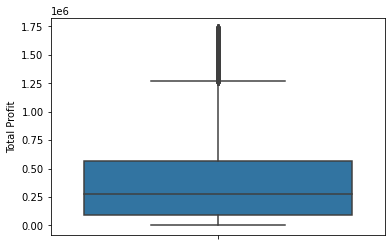

In [24]:
sns.boxplot(y=df['Total Profit'])

<AxesSubplot:ylabel='Total Revenue'>

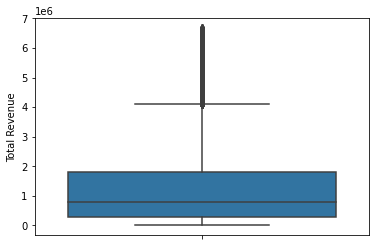

In [25]:
sns.boxplot(y=df['Total Revenue'])

## clean data

### check missing value

In [26]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

no missing value

### check duplicate value

In [27]:
df.duplicated().sum()

0

In [28]:
df.duplicated(['Item Type','Total Cost']).sum()

8820

In [29]:
df.drop_duplicates(['Item Type','Total Cost'],inplace=True)

In [30]:
df.shape

(41180, 14)

## analyise data

<AxesSubplot:>

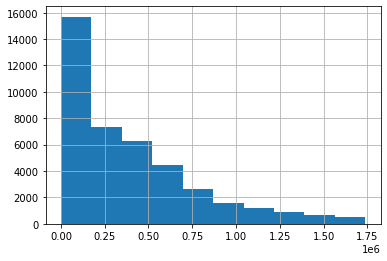

In [32]:
df['Total Profit'].hist()

<AxesSubplot:>

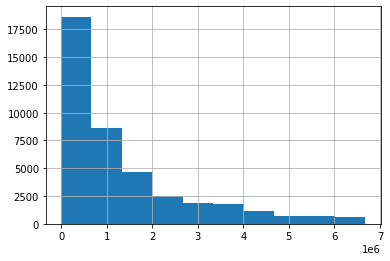

In [33]:
df['Total Revenue'].hist()

<AxesSubplot:>

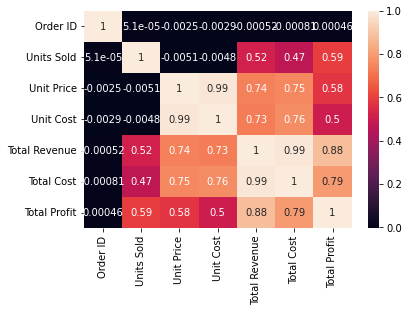

In [34]:
c=df.corr()
sns.heatmap(c,annot=True)

<AxesSubplot:ylabel='Total Cost'>

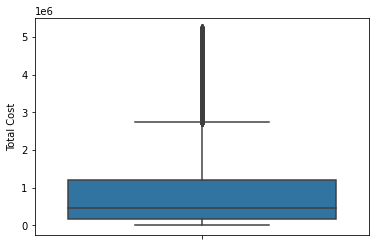

In [36]:
sns.boxplot(y=df['Total Cost'])

<AxesSubplot:ylabel='Total Profit'>

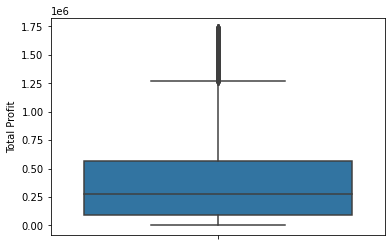

In [37]:
sns.boxplot(y=df['Total Profit'])

<AxesSubplot:ylabel='Total Revenue'>

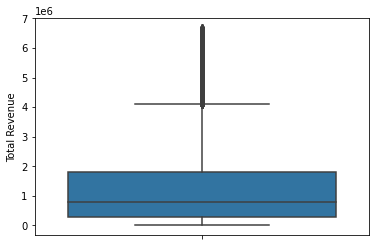

In [38]:
sns.boxplot(y=df['Total Revenue'])

## Questions 

my column hero is total profit<br>
q1 ==> المنطقة الاكثر تحقيقا للمبيعات<br>
q2 ==> أعلى 10 دول تحقيقا للمبيعات<br>
q3 ==> المنتج الاعلى تحقيا للدخل<br>
q4 ==> مقارنة بين طرق المبيعات وايهما أكثر تحقيق للدخل (online/offline) <br>
q5 ==> تحليل زمنى للوقت الشحن ووقت التسليم<br>

### question 1

In [48]:
x=df.groupby('Region')['Total Profit'].sum()
df_q1=pd.DataFrame(x)
df_q1.reset_index(inplace=True)

,Region,Total Profit
0,Asia,2.358881e+09
1,Australia and Oceania,1.308085e+09
2,Central America and the Caribbean,1.722758e+09
3,Europe,4.108232e+09
4,Middle East and North Africa,2.006099e+09
5,North America,3.595433e+08
6,Sub-Saharan Africa,4.227533e+09


Text(0, 0.5, 'Total Profit')

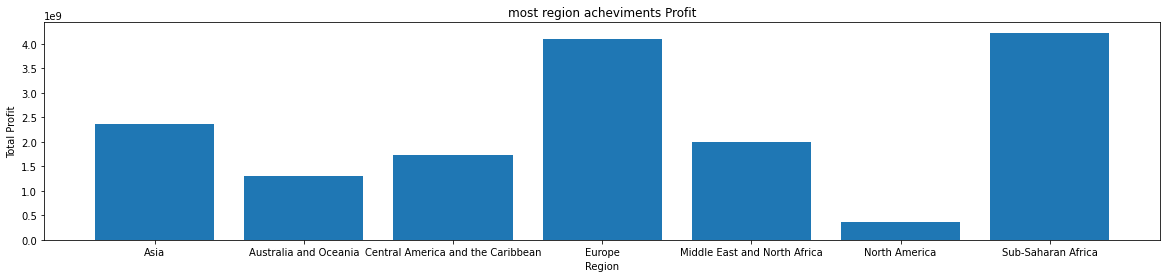

In [54]:
plt.figure(figsize=(20,4))
plt.bar(x=df_q1['Region'],height=df_q1['Total Profit'])
plt.title("most region acheviments Profit")
plt.xlabel("Region")
plt.ylabel("Total Profit")

### question 2

In [56]:
df_q2=df.groupby('Country')['Total Profit'].agg([sum]).sort_values(by=('sum'),ascending=False).head(10)
df_q2=pd.DataFrame(df_q2)
df_q2.reset_index(inplace=True)
df_q2

,Country,sum
0,Democratic Republic of the Congo,1.113824e+08
1,Maldives,1.094620e+08
2,Samoa,1.078078e+08
3,Gabon,1.044720e+08
4,Guinea,1.033796e+08
5,Malaysia,1.014283e+08
6,Mexico,1.013676e+08
7,Qatar,1.009968e+08
8,Norway,1.003732e+08
9,Grenada,1.002459e+08


Text(0, 0.5, 'Total Profit')

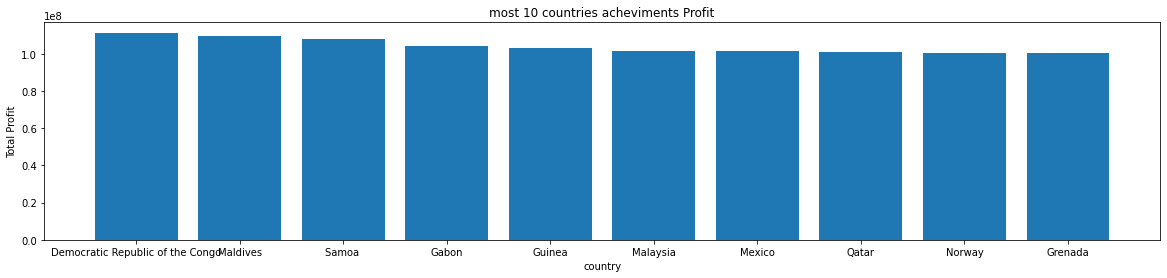

In [58]:
plt.figure(figsize=(20,4))
plt.bar(x=df_q2['Country'],height=df_q2['sum'])
plt.title("most 10 countries acheviments Profit")
plt.xlabel("country")
plt.ylabel("Total Profit")

### question 3

In [61]:
x=df.groupby('Item Type')['Total Profit'].agg([sum]).sort_values(by=('sum'),ascending=False)
df_q3=pd.DataFrame(x)
df_q3.reset_index(inplace=True)
df_q3

,Item Type,sum
0,Cosmetics,3.016324e+09
1,Household,2.788859e+09
2,Office Supplies,2.168250e+09
3,Baby Food,1.616352e+09
4,Cereal,1.489650e+09
5,Clothes,1.248434e+09
6,Vegetables,1.078539e+09
7,Meat,9.829950e+08
8,Snacks,9.503484e+08
9,Personal Care,4.370802e+08


Text(0, 0.5, 'Total Profit')

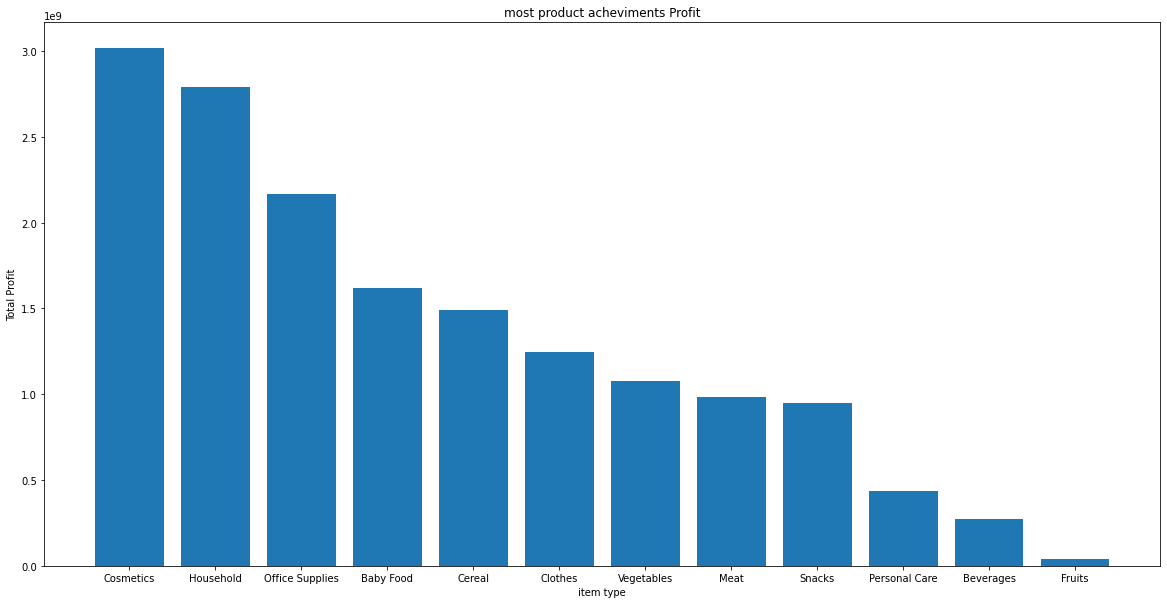

In [64]:
plt.figure(figsize=(20,10))
plt.bar(x=df_q3['Item Type'],height=df_q3['sum'])
plt.title("most product acheviments Profit")
plt.xlabel('item type')
plt.ylabel("Total Profit")

### question 4

In [65]:
x=df.groupby('Sales Channel')['Total Profit'].sum()
df_q4=pd.DataFrame(x)
df_q4.reset_index(inplace=True)
df_q4

,Sales Channel,Total Profit
0,Offline,8.034938e+09
1,Online,8.056192e+09


Text(0.5, 1.0, 'Compare between sales channel elements')

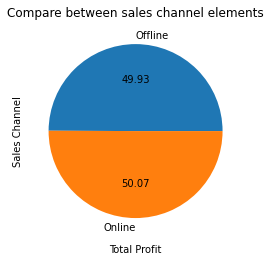

In [66]:
plt.pie(df_q4['Total Profit'],labels=df_q4['Sales Channel'],autopct="%.2f")
plt.xlabel("Total Profit")
plt.ylabel("Sales Channel")
plt.title("Compare between sales channel elements")

### question 5

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41180 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          41180 non-null  object 
 1   Country         41180 non-null  object 
 2   Item Type       41180 non-null  object 
 3   Sales Channel   41180 non-null  object 
 4   Order Priority  41180 non-null  object 
 5   Order Date      41180 non-null  object 
 6   Order ID        41180 non-null  int64  
 7   Ship Date       41180 non-null  object 
 8   Units Sold      41180 non-null  int64  
 9   Unit Price      41180 non-null  float64
 10  Unit Cost       41180 non-null  float64
 11  Total Revenue   41180 non-null  float64
 12  Total Cost      41180 non-null  float64
 13  Total Profit    41180 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 4.7+ MB


In [68]:
df['Ship Date']=pd.to_datetime(df['Ship Date'])
df['Order Date']=pd.to_datetime(df['Order Date'])

<AxesSubplot:xlabel='Order Date'>

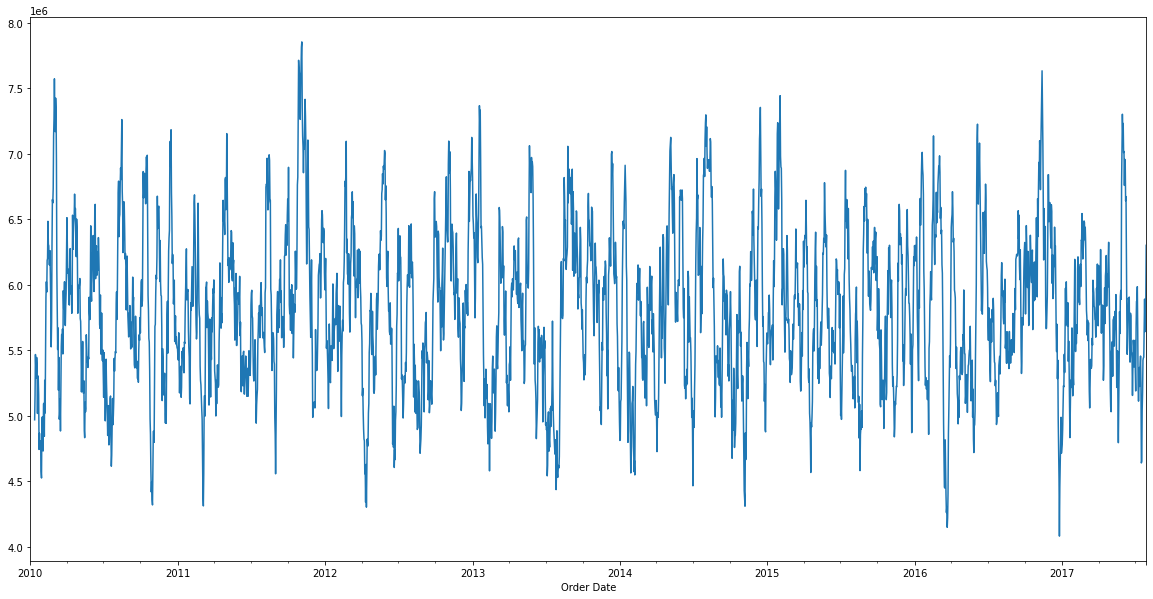

In [73]:
x=df.groupby(['Order Date'])['Total Profit'].sum()
x.rolling(12).mean().plot(figsize=(20,10))

### question 6

In [75]:
x=df.groupby(['Order Priority'])['Total Profit'].sum()
df_q6=pd.DataFrame(x)
df_q6.reset_index(inplace=True)
df_q6

,Order Priority,Total Profit
0,C,4.016901e+09
1,H,4.025370e+09
2,L,4.044624e+09
3,M,4.004236e+09


Text(0.5, 1.0, 'Compare between sales Order Priority elements')

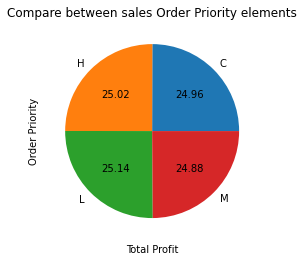

In [77]:
plt.pie(df_q6['Total Profit'],labels=df_q6['Order Priority'],autopct="%.2f")
plt.xlabel("Total Profit")
plt.ylabel("Order Priority")
plt.title("Compare between sales Order Priority elements")

## conclusion

sales channel is not effect on profit<br>
Sub-Saharan Africa region is mode profit<br>
Cosmetics is highest product profit<br>
Democratic Republic of the Congo is highest country profit<br>